Recreate the bar chart on this page with some real data: https://urbaninstitute.github.io/graphics-styleguide/


# Exercise: Creating a custom bar chart 

Per capita energy consumption provides a sense of, on average, how much energy each person in a region uses. Let's create a plot that compares this across a few regions. Per capita fossil fuel energy consumption is measured in kilowatt-hours per person. The higher this value, the more fossil-fuel-based energy is consumed per person within a region uses. To tell a story, we want to compare PLACE A to PLACE B's energy consumption, in the context of the other 25 most energy-intensive countries. Your goal is to replicate the plot below EXACTLY.

The data are provided in the file `fossil-fuels-per-capita.csv` and are from [Our World in Data](https://ourworldindata.org/grapher/fossil-fuels-per-capita?tab=table).

We'll provide you with the hex codes for the exact colors to use in the plot and can provide the dimensions of the figure to get you started:
- Blue = #1696d2
- Yellow = 
- Black = 
- Figure size = X in by X in
- Save your figure to png at a dpi of 300

Be sure to include the top 25 most fossil fuel intensive regions per capita as well as the following regions:
- High-income countries
- Upper-middle-income countries
- Lower-middle-income countries
- World
- Africa
- Asia
- Europe
- North America
- South America


In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/fossil-fuels-per-capita.csv")
df

,entity,fossil_fuels
0,Africa,3564.061
1,Algeria,15416.595
2,Argentina,18648.033
3,Asia,16382.810
4,Australia,53779.406
...,...,...
79,Upper-middle-income countries,24585.860
80,Uzbekistan,16082.265
81,Venezuela,18473.283
82,Vietnam,10616.693


In [2]:
# Filter the data

regions = ["World", "Africa", "Asia", "Europe", "North America", "South America"]

in_regions = df.loc[df["entity"].isin(regions)]
other_regions = places = df.loc[~df["entity"].isin(regions)]

energy = other_regions.sort_values(by=["fossil_fuels"], ascending=False).head(25)
fossil_temp = pd.concat([in_regions, energy], ignore_index=True)
fossil = (
    fossil_temp.sort_values(by=["fossil_fuels"], ascending=True)
    .reset_index()
    .drop(columns=["index"])
)
fossil

,entity,fossil_fuels
0,Africa,3564.061
1,South America,10600.557
2,Asia,16382.810
3,World,17430.111
4,Europe,28404.564
5,Czechia,29895.691
6,Israel,31346.912
7,Japan,32709.630
8,Hong Kong,33182.870
9,Oceania,34227.150


Text(0.5, 0, 'Fossil fuel consumption per capita (kWh per person)')

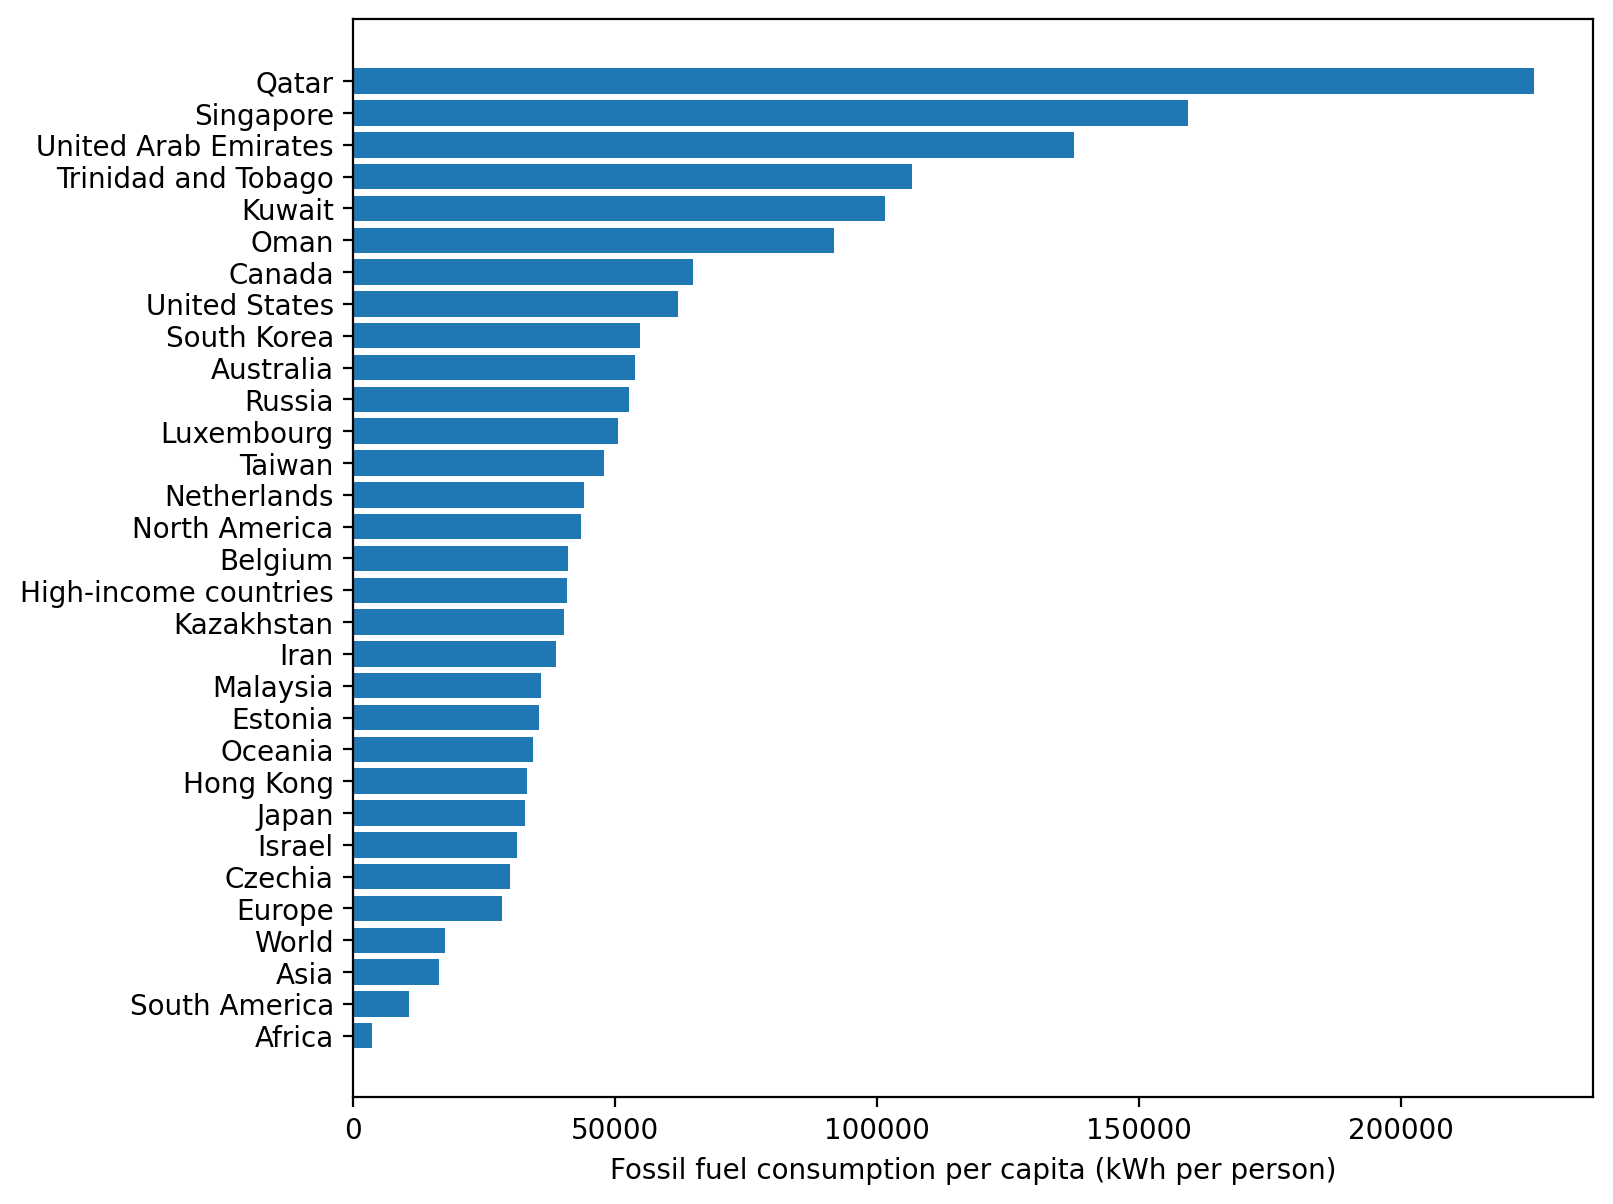

In [3]:
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(fossil["entity"], fossil["fossil_fuels"])

ax.set_xlabel("Fossil fuel consumption per capita (kWh per person)")

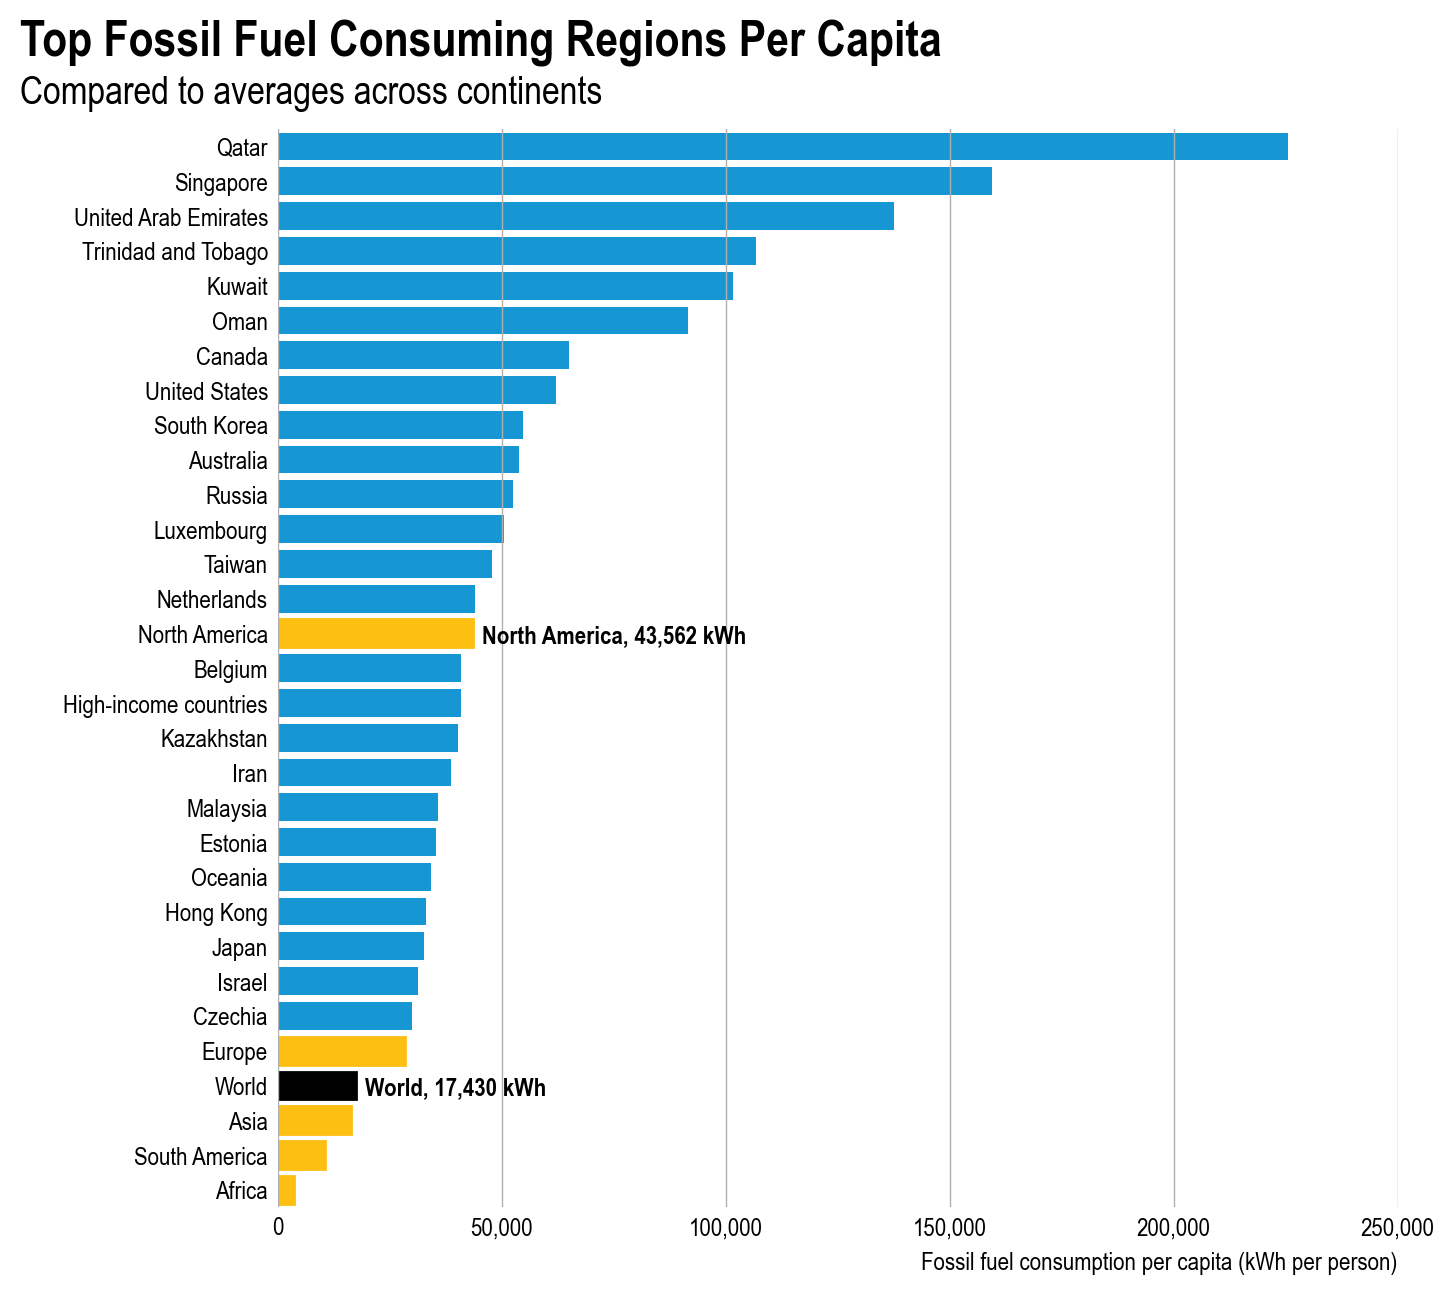

In [44]:
import matplotlib as mpl

blue = "#1696d2"
yellow = "#fdbf11"
black = "#000000"

continents = ["Africa", "Asia", "Europe", "North America", "South America"]
mpl.rcParams["font.size"] = 9
mpl.rcParams["font.sans-serif"] = [
    "Arial Narrow",
    "DejaVu Sans",
    "Lucida Grande",
    "Verdana",
]
fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(fossil["entity"], fossil["fossil_fuels"], color=blue, label="Region")


def set_bar_color(df, region, bars, color):
    bar_index = df.loc[df["entity"] == region].index[0]
    bars[bar_index].set_color(color)


def set_regions_color(df, region_list, bars, color):
    for place in region_list:
        set_bar_color(df, place, bars, color)


# Set the continents to one color
continent_color = yellow

set_regions_color(fossil, continents, bars, continent_color)
set_bar_color(fossil, "World", bars, black)

ax.set_xlabel("Fossil fuel consumption per capita (kWh per person)", loc="right")
ax.spines[:].set_visible(False)
ax.grid(visible=True, axis="x", linewidth="0.5")
ax.tick_params(axis="both", length=0)
ax.set_ylim([-0.5, len(fossil) - 0.5])
ax.set_xticks([0, 5e4, 10e4, 15e4, 20e4, 25e4])
ax.set_xticklabels(["0", "50,000", "100,000", "150,000", "200,000", "250,000"])
fig.subplots_adjust(left=0.2)

# Add custom titles
ax.text(
    -0.23,
    1.08,
    "Top Fossil Fuel Consuming Regions Per Capita",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    fontweight="bold",
    fontsize=18,
)
ax.text(
    -0.23,
    1.05,
    "Compared to averages across continents",
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
    fontsize=14,
)

# Add in labels for the world, Africa, and North America
places_to_label = ["World", "North America"]


def label_place(ax, df, place):
    cplace = df.loc[df["entity"] == place]["fossil_fuels"]
    fuel = cplace.values[0]
    string = f"{place}, {fuel:,.0f} kWh"
    ax.text(
        fuel + 2000,
        cplace.index[0] + 0.25,
        string,
        horizontalalignment="left",
        verticalalignment="top",
        fontweight="bold",
    )


for place in places_to_label:
    label_place(ax, fossil, place)


# Combine with population data to plot the 25 largest countries by population (representing X% of the worlds population)
# Add Source

# fig.savefig('img/fossil_fuel.png', dpi=600)